In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


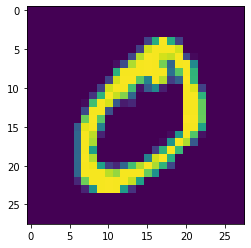

In [ ]:
plt.imshow(train_images[1])

In [ ]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)

In [ ]:
train_images = ( train_images - 127.5)/127.5

In [ ]:
BUFFER_SIZE = train_images.shape[0]
BATCH_SIZE = 80
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Discriminator Model

In [ ]:
def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(7,(3,3),padding="same",input_shape=(28,28,1)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dense(50,activation = "relu"))
  return model

In [ ]:
model_discriminator = make_discriminator_model()

In [ ]:
model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.02572955, 0.40076122, 0.        , 0.19870685, 0.        ,
        0.        , 0.25518265, 0.08410153, 0.5055086 , 0.00434768,
        0.28600883, 0.22905914, 0.        , 0.24638776, 0.        ,
        0.47765246, 0.05893404, 0.31642053, 0.        , 0.1364754 ,
        0.        , 0.13619982, 0.        , 0.28282937, 0.3079714 ,
        0.08219587, 0.3332496 , 0.        , 0.30695036, 0.05805986,
        0.05644659, 0.30307734, 0.34947288, 0.01438166, 0.        ,
        0.        , 0.22607072, 0.        , 0.        , 0.01473381,
        0.0121828 , 0.00412338, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03059911, 0.        ]],
      dtype=float32)>

In [ ]:
discriminator_optimizer = tf.optimizers.Adam(1e-3)

In [ ]:
def get_discriminator_loss(real_predictions,fake_predictions):
  real_predictions = tf.sigmoid(real_predictions)
  fake_predictions = tf.sigmoid(fake_predictions)
  real_loss = tf.losses.binary_crossentropy(tf.ones_like(real_predictions),real_predictions)
  fake_loss = tf.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
  return fake_loss+real_loss

# Generator

In [ ]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(7*7*256,input_shape=(100,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Reshape((7,7,256)))
  model.add(tf.keras.layers.Conv2DTranspose(128,(3,3),padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2DTranspose(1,(3,3),strides=(2,2),padding="same"))
  return model

In [ ]:
generator = make_generator_model()

In [ ]:
generator_optimizer = tf.optimizers.Adam(1e-4)

In [ ]:
def get_generator_loss(fake_predictions):
  fake_predictions = tf.sigmoid(fake_predictions)
  fake_loss = tf.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
  return fake_loss

# Training

In [ ]:
def train(dataset,epochs):
  for _ in range(epochs):
    for images in dataset:
      images = tf.cast(images,tf.dtypes.float32)
      train_step(images)

In [ ]:
def train_step(images):
  fake_image_noise = np.random.randn(BATCH_SIZE,100).astype("float32")
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    generated_images = generator(fake_image_noise)
    real_output = model_discriminator(images)
    fake_output = model_discriminator(generated_images)

    gen_loss = get_generator_loss(fake_output)
    disc_loss = get_discriminator_loss(real_output,fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss,model_discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,model_discriminator.trainable_variables))

    print("Generator Loss : ")
    print(np.mean(gen_loss))
    print("Discriminator Loss :")
    print(np.mean(disc_loss))

In [ ]:
train(train_dataset,6)

Streaming output truncated to the last 5000 lines.
Generator Loss : 
0.6729688
Discriminator Loss :
0.8092598
Generator Loss : 
0.6754774
Discriminator Loss :
0.80825007
Generator Loss : 
0.6813796
Discriminator Loss :
0.79211545
Generator Loss : 
0.66929007
Discriminator Loss :
0.8127998
Generator Loss : 
0.68472373
Discriminator Loss :
0.8354743
Generator Loss : 
0.684395
Discriminator Loss :
0.8022601
Generator Loss : 
0.6729906
Discriminator Loss :
0.8143485
Generator Loss : 
0.672416
Discriminator Loss :
0.82522947
Generator Loss : 
0.6854583
Discriminator Loss :
0.8045562
Generator Loss : 
0.6849234
Discriminator Loss :
0.82353324
Generator Loss : 
0.6862859
Discriminator Loss :
0.80930865
Generator Loss : 
0.6731037
Discriminator Loss :
0.8057507
Generator Loss : 
0.64813006
Discriminator Loss :
0.83679235
Generator Loss : 
0.68239725
Discriminator Loss :
0.81518286
Generator Loss : 
0.6931469
Discriminator Loss :
0.8146842
Generator Loss : 
0.68052566
Discriminator Loss :
0.810

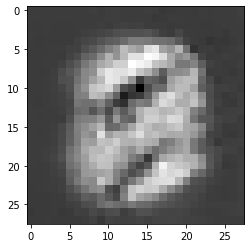

In [ ]:
plt.imshow(tf.reshape(generator(np.random.rand(1,100)),(28,28)),cmap="gray")